In [1]:
import pandas as pd
import glob
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
from plotnine import *
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#path = "d:\\Summer Practicum\\1_Data\\On_Time_Marketing_Carrier_On_Time_Performance_Beginning_January_2018_2023_All_Months"
#all_files = glob.glob(os.path.join(path,'*.csv'))

    # Read all files in the Data folder
#df = pd.concat((pd.read_csv(f,low_memory = False) for f in all_files), ignore_index=True)

In [3]:
#df2 = df[(df['Cancelled'] == 0) & (df['Diverted'] == 0)][['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Operating_Airline ', 'OriginAirportID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateName', 'DestAirportID', 'Dest', 'DestCityName', 'DestState', 'DestStateName', 'DepTime', 'DepDelay', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'TaxiOut', 'TaxiIn', 'ArrTimeBlk', 'AirTime', 'Distance', 'CarrierDelay']]
#df2.to_csv('earlyarrivals.csv', index=False)


In [4]:
df = pd.read_csv("D:\\Summer Practicum\\1_Data\\earlyarrivals.csv")

In [5]:
len(df)
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,...,DepTimeBlk,CRSArrTime,ArrTime,ArrDelay,TaxiOut,TaxiIn,ArrTimeBlk,AirTime,Distance,CarrierDelay
0,2022,4,10,29,6,2022-10-29,UA,11066,CMH,"Columbus, OH",...,0600-0659,828,858.0,30.0,12.0,7.0,0800-0859,163.0,986.0,16.0
1,2022,4,10,29,6,2022-10-29,UA,12758,KOA,"Kona, HI",...,2100-2159,603,537.0,-26.0,12.0,9.0,0600-0659,277.0,2504.0,NaN
2,2022,4,10,29,6,2022-10-29,UA,14747,SEA,"Seattle, WA",...,0700-0759,1609,1559.0,-10.0,26.0,9.0,1600-1659,282.0,2402.0,NaN
3,2022,4,10,29,6,2022-10-29,UA,12889,LAS,"Las Vegas, NV",...,1900-1959,2050,2035.0,-15.0,15.0,3.0,2000-2059,71.0,414.0,NaN
4,2022,4,10,29,6,2022-10-29,UA,14685,SAV,"Savannah, GA",...,0600-0659,825,802.0,-23.0,10.0,5.0,0800-0859,94.0,708.0,NaN


In [6]:
#top_10_airlines = ['AA','DL','UA','WN','AS','B6','NK','F9','G4','HA']
#date_df = df[(df['Operating_Airline '].isin(top_10_airlines))].copy()
date_df = df.copy()
date_df['ANext_5'] = None
date_df['ATaxi_5'] = None

In [7]:
date_df['ArrTime'] = date_df['ArrTime'].fillna(0).astype(int).astype(str).str.zfill(4)
date_df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,...,ArrTime,ArrDelay,TaxiOut,TaxiIn,ArrTimeBlk,AirTime,Distance,CarrierDelay,ANext_5,ATaxi_5
0,2022,4,10,29,6,2022-10-29,UA,11066,CMH,"Columbus, OH",...,0858,30.0,12.0,7.0,0800-0859,163.0,986.0,16.0,None,None
1,2022,4,10,29,6,2022-10-29,UA,12758,KOA,"Kona, HI",...,0537,-26.0,12.0,9.0,0600-0659,277.0,2504.0,NaN,None,None
2,2022,4,10,29,6,2022-10-29,UA,14747,SEA,"Seattle, WA",...,1559,-10.0,26.0,9.0,1600-1659,282.0,2402.0,NaN,None,None
3,2022,4,10,29,6,2022-10-29,UA,12889,LAS,"Las Vegas, NV",...,2035,-15.0,15.0,3.0,2000-2059,71.0,414.0,NaN,None,None
4,2022,4,10,29,6,2022-10-29,UA,14685,SAV,"Savannah, GA",...,0802,-23.0,10.0,5.0,0800-0859,94.0,708.0,NaN,None,None


In [8]:
date_df['FlightDate'] = pd.to_datetime(date_df['FlightDate'], format='%Y-%m-%d')
date_df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,...,ArrTime,ArrDelay,TaxiOut,TaxiIn,ArrTimeBlk,AirTime,Distance,CarrierDelay,ANext_5,ATaxi_5
0,2022,4,10,29,6,2022-10-29,UA,11066,CMH,"Columbus, OH",...,0858,30.0,12.0,7.0,0800-0859,163.0,986.0,16.0,None,None
1,2022,4,10,29,6,2022-10-29,UA,12758,KOA,"Kona, HI",...,0537,-26.0,12.0,9.0,0600-0659,277.0,2504.0,NaN,None,None
2,2022,4,10,29,6,2022-10-29,UA,14747,SEA,"Seattle, WA",...,1559,-10.0,26.0,9.0,1600-1659,282.0,2402.0,NaN,None,None
3,2022,4,10,29,6,2022-10-29,UA,12889,LAS,"Las Vegas, NV",...,2035,-15.0,15.0,3.0,2000-2059,71.0,414.0,NaN,None,None
4,2022,4,10,29,6,2022-10-29,UA,14685,SAV,"Savannah, GA",...,0802,-23.0,10.0,5.0,0800-0859,94.0,708.0,NaN,None,None


Iterate from day to day in the dataset

In [9]:
print(min(date_df['FlightDate']))
print(max(date_df['FlightDate']))

2022-04-01 00:00:00
2023-03-31 00:00:00


In [10]:
start_date = date_df['FlightDate'].dt.date.min()
end_date = date_df['FlightDate'].dt.date.max()

days = []
for day in pd.date_range(start=start_date, end=end_date):
    days.append(day.date())

len(days)

365

In [11]:
unique_ids = date_df['DestAirportID'].unique()
len(unique_ids)

374

In [12]:
# Rolling mean for ANext_5 and ATaxi_5 for every flight
window_size = 5
step = 0
steps = len(unique_ids)
for uid in unique_ids:
    print(f"Processing ID: {uid}")
    filtered = date_df[date_df['DestAirportID'] == uid].sort_values(by = ['FlightDate', 'ArrTime'])
    
    rolling_vals = (filtered['ArrDelay'].shift(-1).rolling(window = window_size, min_periods = 1).mean().shift(-(window_size - 1)))
    rolling_vals2 = (filtered['TaxiIn'].shift(-1).rolling(window = window_size, min_periods = 1).mean().shift(-(window_size - 1)))

    date_df.loc[filtered.index, 'ANext_5'] = rolling_vals
    date_df.loc[filtered.index, 'ATaxi_5'] = rolling_vals2

    step += 1

    print(f"Step {step}/{steps} completed.")
    

Processing ID: 12266
Step 1/374 completed.
Processing ID: 12892
Step 2/374 completed.
Processing ID: 11618
Step 3/374 completed.
Processing ID: 14771
Step 4/374 completed.
Processing ID: 14027
Step 5/374 completed.
Processing ID: 14747
Step 6/374 completed.
Processing ID: 13930
Step 7/374 completed.
Processing ID: 12173
Step 8/374 completed.
Processing ID: 13495
Step 9/374 completed.
Processing ID: 11884
Step 10/374 completed.
Processing ID: 11292
Step 11/374 completed.
Processing ID: 14893
Step 12/374 completed.
Processing ID: 14492
Step 13/374 completed.
Processing ID: 10299
Step 14/374 completed.
Processing ID: 11042
Step 15/374 completed.
Processing ID: 13204
Step 16/374 completed.
Processing ID: 11540
Step 17/374 completed.
Processing ID: 11057
Step 18/374 completed.
Processing ID: 14057
Step 19/374 completed.
Processing ID: 14683
Step 20/374 completed.
Processing ID: 14908
Step 21/374 completed.
Processing ID: 12264
Step 22/374 completed.
Processing ID: 10423
Step 23/374 complete

In [13]:
top_10_airports=['ATL','DFW','DEN','ORD','LAX','CLT','MCO','LAS','PHX','MIA']
top_df = date_df[date_df['Dest'].isin(top_10_airports)]
len(top_df)

2139123

In [14]:
date_df.head(1)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,...,ArrTime,ArrDelay,TaxiOut,TaxiIn,ArrTimeBlk,AirTime,Distance,CarrierDelay,ANext_5,ATaxi_5
0,2022,4,10,29,6,2022-10-29,UA,11066,CMH,"Columbus, OH",...,0858,30.0,12.0,7.0,0800-0859,163.0,986.0,16.0,27.4,8.4


In [15]:
rolling_df = date_df[date_df['DestAirportID'] == 14107].copy()
window_size = 5

rolling_df = rolling_df.sort_values(by = ['FlightDate', 'ArrTime'])
rolling_df['AVG_Next5'] = rolling_df['ArrDelay'].shift(-1).rolling(window = window_size, min_periods=1).mean().shift(-(window_size - 1))


In [16]:
cor = rolling_df[rolling_df['AVG_Next5'].isna() == False].copy()
cor

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,...,ArrDelay,TaxiOut,TaxiIn,ArrTimeBlk,AirTime,Distance,CarrierDelay,ANext_5,ATaxi_5,AVG_Next5
1698671,2022,2,4,1,5,2022-04-01,WN,12892,LAX,"Los Angeles, CA",...,3.0,13.0,8.0,0001-0559,53.0,370.0,NaN,123.4,4.0,123.40
1953177,2022,2,4,1,5,2022-04-01,B6,10721,BOS,"Boston, MA",...,248.0,24.0,4.0,2000-2059,310.0,2300.0,95.0,87.2,4.6,87.20
1995789,2022,2,4,1,5,2022-04-01,DL,11433,DTW,"Detroit, MI",...,109.0,20.0,4.0,2200-2259,221.0,1671.0,109.0,111.8,5.2,111.80
1699046,2022,2,4,1,5,2022-04-01,WN,13232,MDW,"Chicago, IL",...,64.0,7.0,3.0,2300-2359,192.0,1444.0,62.0,95.2,5.2,95.20
1960775,2022,2,4,1,5,2022-04-01,B6,11697,FLL,"Fort Lauderdale, FL",...,126.0,17.0,4.0,2300-2359,277.0,1972.0,21.0,65.6,5.0,65.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491776,2023,1,3,31,5,2023-03-31,AA,11298,DFW,"Dallas/Fort Worth, TX",...,11.0,27.0,6.0,2300-2359,137.0,868.0,NaN,11.6,6.0,11.60
6350236,2023,1,3,31,5,2023-03-31,WN,12889,LAS,"Las Vegas, NV",...,7.0,17.0,5.0,2300-2359,45.0,255.0,NaN,9.2,5.8,9.20
6764181,2023,1,3,31,5,2023-03-31,DL,14869,SLC,"Salt Lake City, UT",...,-10.0,14.0,10.0,2300-2359,72.0,507.0,NaN,11.0,7.8,11.00
6350383,2023,1,3,31,5,2023-03-31,WN,12892,LAX,"Los Angeles, CA",...,37.0,17.0,5.0,2300-2359,56.0,370.0,7.0,2.4,8.8,2.40


** Update this section after full list has the values **

In [17]:
# Filtered to just early arrivals
cor2 = top_df[top_df['ArrDelay'] < 200].copy()
#cor2 = date_df.copy()
cor2.head()
print(len(cor2))


2112672


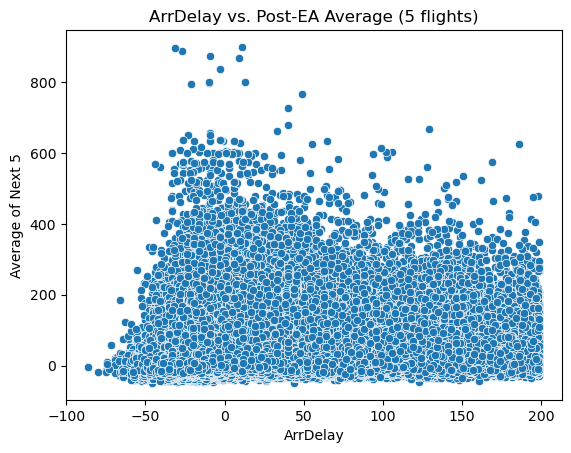

In [18]:
sns.scatterplot(data = cor2, x = "ArrDelay", y = "ANext_5")
plt.title("ArrDelay vs. Post-EA Average (5 flights)")
plt.xlabel("ArrDelay")
plt.ylabel("Average of Next 5")

plt.show()

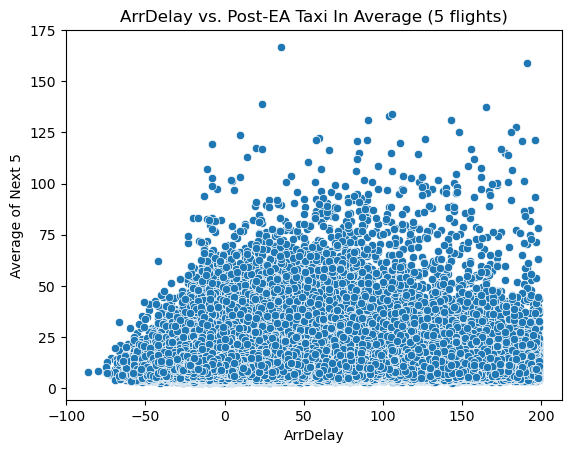

In [19]:
sns.scatterplot(data = cor2, x = "ArrDelay", y = "ATaxi_5")
plt.title("ArrDelay vs. Post-EA Taxi In Average (5 flights)")
plt.xlabel("ArrDelay")
plt.ylabel("Average of Next 5")

plt.show()

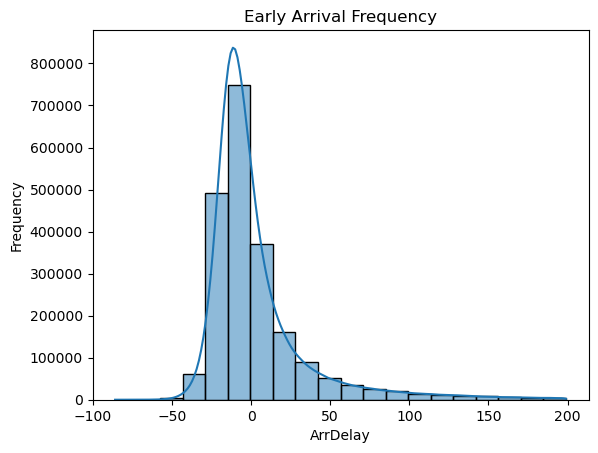

In [20]:
sns.histplot(data=cor2, x="ArrDelay", bins=20, kde=True)
plt.title("Early Arrival Frequency")
plt.xlabel("ArrDelay")
plt.ylabel("Frequency")

plt.show()

In [21]:
threshold = 25

cor_lim = cor2.copy()
cor_lim['taxicap'] = cor2['TaxiIn'].apply(lambda x: x if x <= threshold else threshold + 1)



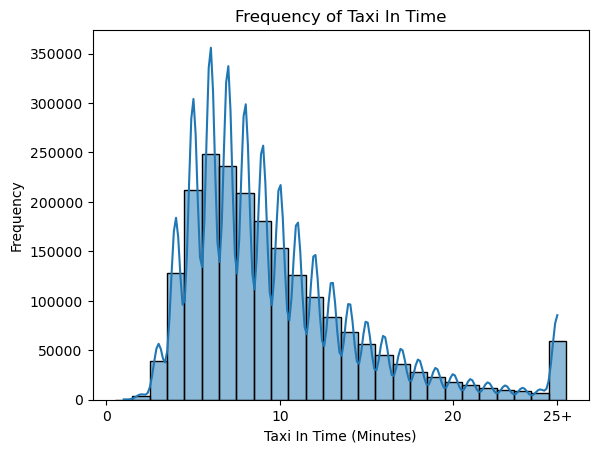

In [22]:
sns.histplot(data=cor_lim, x="taxicap", bins=range(0, threshold + 10, 10), discrete = True, kde=True)
plt.xticks(list(range(0, threshold + 1, 10)) + [threshold + 1], labels = [*range(0, threshold + 1, 10), f'{threshold}+'])
plt.title("Frequency of Taxi In Time")
plt.xlabel("Taxi In Time (Minutes)")
plt.ylabel("Frequency")

plt.show()

In [23]:
correl = cor2['ArrDelay'].corr(cor2['ANext_5'], method = 'pearson')
correl

np.float64(0.27905604566692754)

**Average of ANext_5 and ATaxi_5 for top 10 airports**

In [24]:
top_10_airports=['ATL','DFW','DEN','ORD','LAX','CLT','MCO','LAS','PHX','MIA']

average_top_10 = top_df.groupby(['Dest'])[['ANext_5', 'ATaxi_5']].mean().reset_index().sort_values(by='ANext_5',ascending=False)
average_top_10

,Dest,ANext_5,ATaxi_5
6,MCO,13.601284,11.055356
3,DFW,12.124115,11.337128
4,LAS,11.971843,8.054204
7,MIA,9.545782,8.924247
9,PHX,8.620646,7.05782
2,DEN,6.549577,9.775424
1,CLT,6.530342,10.951879
5,LAX,6.419272,10.321379
8,ORD,5.117451,12.96785
0,ATL,4.034846,8.347001


In [25]:
#bins = range(1, max(top_df['ArrDelay']))

In [ ]:
# All airports
date_df['ArrDelayBlk'] = (date_df['ArrDelay']//5)*5
date_df.head(10)
date_df[['ArrDelay', 'ArrDelayBlk']].head(10)

ADB_VC = date_df['ArrDelayBlk'].value_counts()

6898074

In [27]:
# Top 10 airports
top_df['ArrDelayBlk'] = (top_df['ArrDelay']//5)*5
top_df.head(10)
top_df[['ArrDelay', 'ArrDelayBlk']].head(10)

ADB_VC = top_df['ArrDelayBlk'].value_counts()

C:\Users\wjcawley\AppData\Local\Temp\7\ipykernel_24380\2777269240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
top_df

In [28]:
ADB_VC

ArrDelayBlk
-15.0      290438
-10.0      282134
-20.0      231629
-5.0       231174
 0.0       172212
            ...  
 1860.0         1
 3245.0         1
 1945.0         1
 1405.0         1
 1980.0         1
Name: count, Length: 446, dtype: int64

In [29]:
arrdelayblk_grouped_avg = date_df.groupby(['ArrDelayBlk'])[['ANext_5', 'ATaxi_5']].mean().reset_index().sort_values(by='ArrDelayBlk', ascending=True)
arrdelayblk_grouped_avg

,ArrDelayBlk,ANext_5,ATaxi_5
0,-100.0,7.5,11.3
1,-95.0,-2.9,6.75
2,-90.0,25.8,6.64
3,-85.0,37.2,8.025
4,-80.0,1.677778,8.033333
...,...,...,...
459,4315.0,-5.2,6.4
460,4405.0,15.4,5.8
461,5320.0,-2.6,5.4
462,5985.0,28.8,3.4


In [59]:
arrdelayblk_grouped_avg2 = date_df.groupby(['ArrDelayBlk']).agg(ANext_5 = ('ANext_5', 'mean'), count = ('ArrDelayBlk', 'count')).reset_index()
arrdelayblk_grouped_avg2
arrdelayblk_grouped_avg = arrdelayblk_grouped_avg2[arrdelayblk_grouped_avg2['count'] >= 20]

In [53]:
# Full Range
arrdelayblk_grouped_avg_filt = arrdelayblk_grouped_avg[(arrdelayblk_grouped_avg['ArrDelayBlk'] <= 2000)].copy()

In [37]:
# Range between 50 and 400
arrdelayblk_grouped_avg_filt = arrdelayblk_grouped_avg[(arrdelayblk_grouped_avg['ArrDelayBlk'] <= 400) & (arrdelayblk_grouped_avg['ArrDelayBlk']  >= 50)].copy()

In [66]:
# Range between roughly -100 and 750
arrdelayblk_grouped_avg_filt = arrdelayblk_grouped_avg[(arrdelayblk_grouped_avg['ArrDelayBlk'] <= 750)].copy()

In [64]:
# Range between -100 and 50
arrdelayblk_grouped_avg_filt = arrdelayblk_grouped_avg[(arrdelayblk_grouped_avg['ArrDelayBlk'] <= 50)].copy()

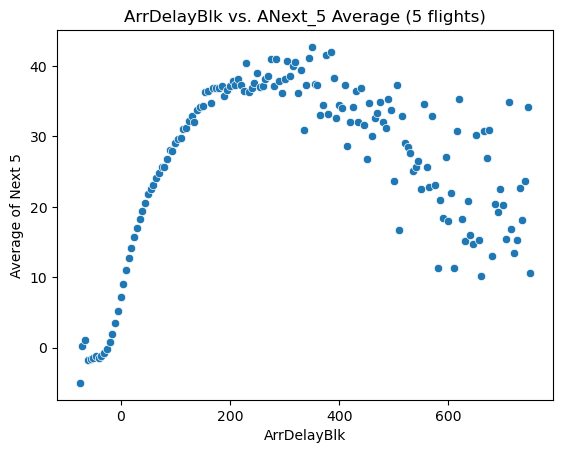

In [67]:
sns.scatterplot(data = arrdelayblk_grouped_avg_filt, x = "ArrDelayBlk", y = "ANext_5")
plt.title("ArrDelayBlk vs. ANext_5 Average (5 flights)")
plt.xlabel("ArrDelayBlk")
plt.ylabel("Average of Next 5")

plt.show()

In [ ]:
bin_arrdelay_anext5_avg = top_df.groupby(['ArrDelay'])[['ANext_5', 'ATaxi_5']].mean().reset_index().sort_values(by='ANext_5', ascending=False)
bin_arrdelay_anext5_avg

,ArrDelay,ANext_5,ATaxi_5
1583,1655.0,435.4,9.8
1690,2687.0,305.2,13.6
1255,1185.0,234.0,14.4
1598,1702.0,231.2,7.2
1292,1222.0,226.8,8.8
...,...,...,...
1365,1306.0,-24.6,9.6
1691,2696.0,-24.8,6.4
1074,1001.0,-25.2,9.4
1562,1606.0,-25.8,10.0


In [27]:
# Setup for ABS value testing
abs_df = date_df.copy()
abs_df['ArrDelay'] = abs(abs_df['ArrDelay'])

dest_ids = abs_df['DestAirportID'].unique()
len(dest_ids)

window_size = 5
step = 0
steps = len(dest_ids)
for uid in dest_ids:
    print(f"Processing ID: {uid}")
    filtered = abs_df[abs_df['DestAirportID'] == uid].sort_values(by = ['FlightDate', 'ArrTime'])
    
    rolling_vals = (filtered['ArrDelay'].shift(-1).rolling(window = window_size, min_periods = 1).mean().shift(-(window_size - 1)))
    rolling_vals2 = (filtered['TaxiIn'].shift(-1).rolling(window = window_size, min_periods = 1).mean().shift(-(window_size - 1)))

    abs_df.loc[filtered.index, 'ANext_5'] = rolling_vals
    abs_df.loc[filtered.index, 'ATaxi_5'] = rolling_vals2

    step += 1

    print(f"Step {step}/{steps} completed.")


top_10_airports=['ATL','DFW','DEN','ORD','LAX','CLT','MCO','LAS','PHX','MIA']
abs_top = abs_df[abs_df['Dest'].isin(top_10_airports)]


Processing ID: IAH
Step 1/374 completed.
Processing ID: LAX
Step 2/374 completed.
Processing ID: EWR
Step 3/374 completed.
Processing ID: SFO
Step 4/374 completed.
Processing ID: PBI
Step 5/374 completed.
Processing ID: SEA
Step 6/374 completed.
Processing ID: ORD
Step 7/374 completed.
Processing ID: HNL
Step 8/374 completed.
Processing ID: MSY
Step 9/374 completed.
Processing ID: GEG
Step 10/374 completed.
Processing ID: DEN
Step 11/374 completed.
Processing ID: SMF
Step 12/374 completed.
Processing ID: RDU
Step 13/374 completed.
Processing ID: ANC
Step 14/374 completed.
Processing ID: CLE
Step 15/374 completed.
Processing ID: MCO
Step 16/374 completed.
Processing ID: ELP
Step 17/374 completed.
Processing ID: CLT
Step 18/374 completed.
Processing ID: PDX
Step 19/374 completed.
Processing ID: SAT
Step 20/374 completed.
Processing ID: SNA
Step 21/374 completed.
Processing ID: IAD
Step 22/374 completed.
Processing ID: AUS
Step 23/374 completed.
Processing ID: RSW
Step 24/374 completed.
P

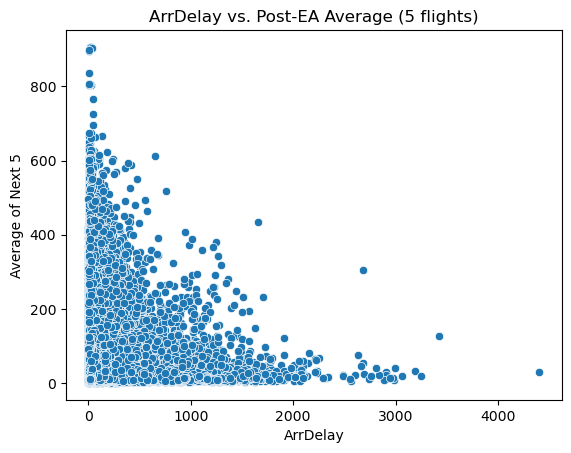

In [28]:
sns.scatterplot(data = abs_top, x = "ArrDelay", y = "ANext_5")
plt.title("ArrDelay vs. Post-EA Average (5 flights)")
plt.xlabel("ArrDelay")
plt.ylabel("Average of Next 5")

plt.show()

Check the correlation between ArrDelay and AVG_Next5

In [56]:
cor2['ANext_5'].dtype
cor2['ANext_5'] = pd.to_numeric(cor2['ANext_5'], errors='coerce')
cor3 = cor2.dropna(subset=['ANext_5'], inplace = False).copy()

In [57]:
model = smf.ols("ANext_5 ~ ArrDelay", data = cor3).fit()
#model = smf.ols("AVG_Next5 ~ ArrDelay  + I(ArrDelay**2) + C(DayOfWeek)", data=cor).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ANext_5   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                 1.784e+05
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:07:39   Log-Likelihood:            -1.0290e+07
No. Observations:             2112635   AIC:                         2.058e+07
Df Residuals:                 2112633   BIC:                         2.058e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6652      0.022    305.631      0.000       6.622       6.708
ArrDelay       0.2827      0.001    422.384      0.000       0.281       0.284
==============================================================================
Omnibus:                  1963770.885   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        120081799.029
Skew:                           4.378   Prob(JB):                         0.00
Kurtosis:                      38.882   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

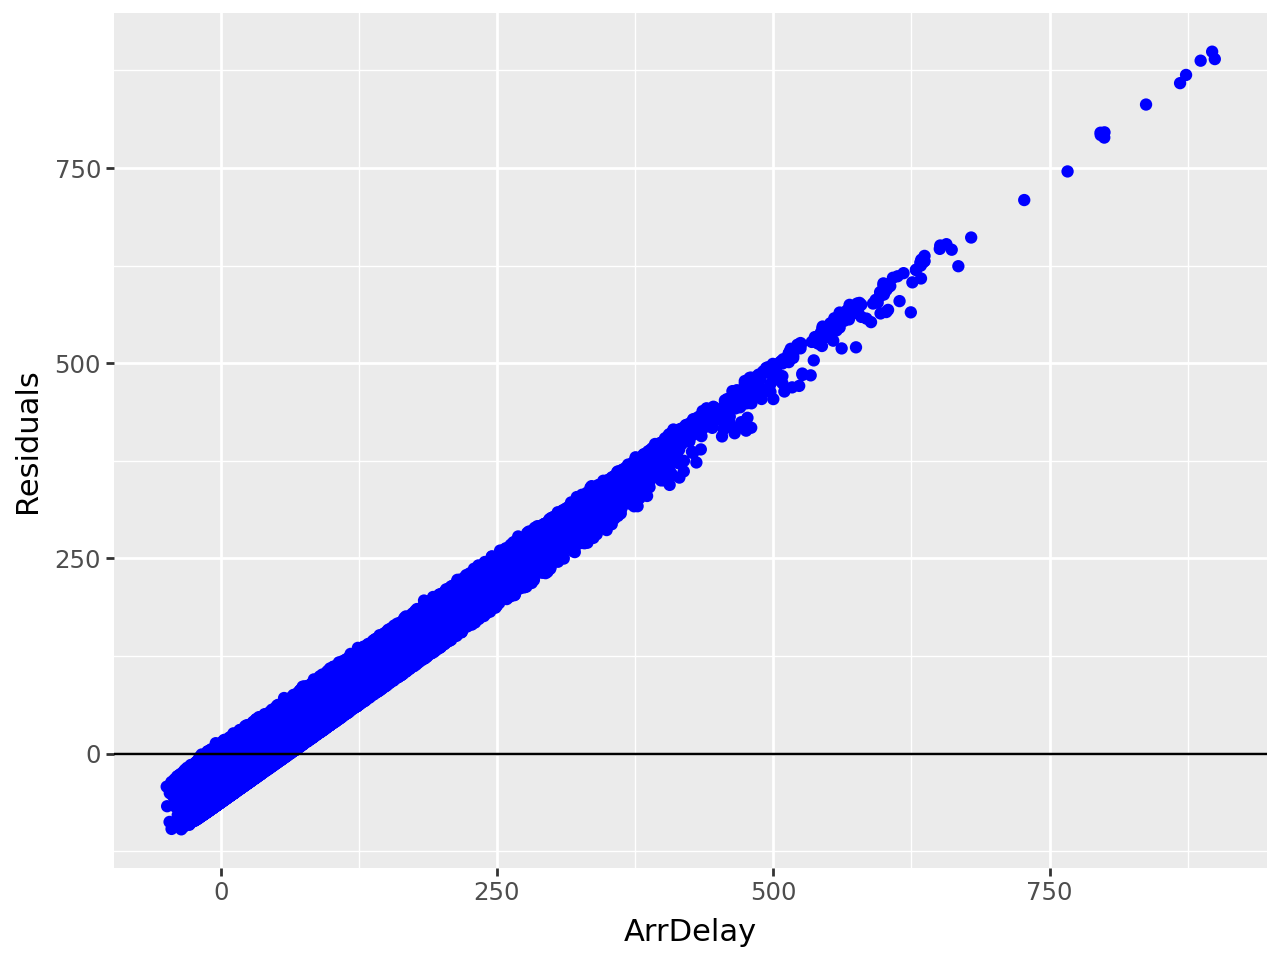

In [58]:
cor3['pred_mlr'] = model.predict()
cor3['resid_mlr'] = model.resid

p = (ggplot(cor3, aes(x = "ANext_5", y = "resid_mlr")) + geom_point(color = "blue") + geom_hline(yintercept = 0) + labs(x="ArrDelay", y="Residuals"))

p.show()